### Library

In [1]:
!pip install Sastrawi

In [64]:
# Mengimpor modul yang diperlukan
import nltk
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Memecah Kalimat

In [65]:
from nltk.tokenize import sent_tokenize

def sentence_extraction(text):
    sentences = sent_tokenize(text)
    return sentences

### Preprosesing

In [66]:
# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Mendapatkan daftar stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

def preprocess_sentence(sentence):
    sentence_cleaned = re.sub(r'[^a-zA-Z\s.]', '', sentence)  # Hanya biarkan alfabet dan titik
    sentence_cleaned = sentence_cleaned.lower()  # Ubah ke huruf kecil
    stemmed = stemmer.stem(sentence_cleaned)  # Stemming
    final_sentence = re.sub(r'\s+', ' ', stemmed).strip()  # Menghapus spasi ganda

    # Menghapus stopwords
    final_sentence = ' '.join([word for word in final_sentence.split() if word not in stop_words])

    return final_sentence

### TF-IDF

In [67]:
def calculate_tfidf(sentences):
    if not sentences:  # Validasi input kosong
        return None, []
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(sentences)
    return tfidf_matrix, vectorizer.get_feature_names_out()


### Cosine Similarity

In [26]:
def calculate_cosine_similarity(tfidf_matrix):
    # Menghitung Cosine Similarity antar kalimat
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    return cosine_sim


### Matriks Adjacency

In [69]:
def create_adjacency_matrix(cosine_sim_matrix, threshold=0.2):
    # Membentuk matriks adjacency berdasarkan cosine similarity dan threshold
    adjacency_matrix = (cosine_sim_matrix > threshold).astype(int)
    np.fill_diagonal(adjacency_matrix, 0)  # Mengisi diagonal dengan 0 agar tidak ada self-loop
    return adjacency_matrix

### Graph

In [72]:
def draw_graph(adjacency_matrix):
    # Mengubah variabel dan parameter visualisasi
    graph = nx.from_numpy_array(adjacency_matrix)
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='skyblue', font_weight='bold', node_size=600, edge_color='gray')
    plt.title("Graf Representasi Kalimat")
    plt.show()

### centrality

In [74]:
def compute_centrality(adjacency_matrix, method=1):
    # Konversi adjacency_matrix menjadi graph
    graph = nx.from_numpy_array(adjacency_matrix)

    # Tentukan centrality berdasarkan method yang dipilih
    if method == 1:
        centrality = nx.degree_centrality(graph)
    elif method == 2:
        centrality = nx.closeness_centrality(graph)
    elif method == 3:
        centrality = nx.betweenness_centrality(graph)

    return centrality

### Ringkasan

In [76]:
def generate_summary(sentences, centrality_scores, top_n=3):
    if top_n > len(sentences):  # Validasi top_n agar tidak melebihi jumlah kalimat
        top_n = len(sentences)

    ranked_sentences = sorted(((score, idx) for idx, score in centrality_scores.items()), reverse=True)
    summary = [sentences[idx] for _, idx in ranked_sentences[:top_n]]
    return summary


### Implementasi

In [77]:
# Input dari user: berita
text = input("Masukkan berita: ")

Masukkan berita: Jakarta, CNN Indonesia -- Netizen memperdebatkan pemain yang bakal dipilih jadi kapten dalam pertandingan Timnas Indonesia vs Bahrain di Kualifikasi Piala Dunia 2026. Ada dua opsi yang diyakini bakal jadi pilihan Shin Tae Yong untuk jadi kapten Timnas Indonesia yakni Jordi Amat dan Jay Idzes. Keduanya sama-sama punya jiwa kepemimpinan yang tinggi di atas lapangan.  Beberapa warganet memilih Jay Idzes untuk memimpin skuad Garuda lawan Bahrain. Sebab dalam dua laga terakhir, Jay ditunjuk jadi kapten karena Asnawi Mangkualam jadi cadangan dan Jordi Amat absen.  "Jordi Amat pantas jadi kapten, dia kaya pengalaman," ujar salah satu netizen.  Terlepas dari perdebatan netizen, baik Jay Idzes maupun Jordi Amat adalah pemain berkualitas yang dimiliki Timnas Indonesia saat ini. Keduanya diharapkan bisa tampil maksimal lawan Bahrain apabila diberi kesempatan oleh Shin Tae Yong.  Sebab Indonesia akan menghadapi dua laga penting pada lanjutan putaran ketiga Kualifikasi Piala Dunia 

#### Ekstraksi Kalimat

In [78]:
sentences = sentence_extraction(text)

df_sentences = pd.DataFrame(sentences, columns=["Kalimat"])
df_sentences

,Kalimat
0,"Jakarta, CNN Indonesia -- Netizen memperdebatk..."
1,Ada dua opsi yang diyakini bakal jadi pilihan ...
2,Keduanya sama-sama punya jiwa kepemimpinan yan...
3,Beberapa warganet memilih Jay Idzes untuk memi...
4,"Sebab dalam dua laga terakhir, Jay ditunjuk ja..."
5,"""Jordi Amat pantas jadi kapten, dia kaya penga..."
6,"Terlepas dari perdebatan netizen, baik Jay Idz..."
7,Keduanya diharapkan bisa tampil maksimal lawan...
8,Sebab Indonesia akan menghadapi dua laga penti...
9,Besar harapan skuad Garuda bisa memetik poin p...


#### Preprossesing kalimat-kalimat yang telah di ekstrak

In [55]:
preprocessed_sentences = [preprocess_sentence(sent) for sent in sentences]
df_preprocessed = pd.DataFrame(preprocessed_sentences, columns=["kalimat_clean"])

df_preprocessed

,kalimat_clean
0,jakarta cnn indonesia netizen debat main yang ...
1,ada dua opsi yang yakin bakal jadi pilih shin ...
2,dua samasama punya jiwa pimpin yang tinggi di ...
3,beberapa warganet pilih jay idzes untuk pimpin...
4,sebab dalam dua laga akhir jay tunjuk jadi kap...
5,jordi amat pantas jadi kapten dia kaya alam uj...
6,lepas dari debat netizen baik jay idzes maupun...
7,dua harap bisa tampil maksimal lawan bahrain a...
8,sebab indonesia akan hadap dua laga penting pa...
9,besar harap skuad garuda bisa petik poin penuh...


#### TF-IDF

In [79]:
tfidf_matrix, feature_names = calculate_tfidf(preprocessed_sentences)

print(tfidf_matrix.toarray())

[[0.         0.         0.         ... 0.         0.18348819 0.        ]
 [0.         0.22738974 0.         ... 0.26272249 0.18287575 0.22738974]
 [0.         0.         0.         ... 0.         0.24594811 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.26276205 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


#### Menghitung Cosine Similarity

In [80]:
cosine_sim_matrix = calculate_cosine_similarity(tfidf_matrix)
df_cosine_similarity = pd.DataFrame(cosine_sim_matrix)

df_cosine_similarity

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,0.297236,0.090257,0.102792,0.145524,0.133378,0.266781,0.038499,0.238738,0.052629,0.229370,0.050935,0.093452,0.000000
1,0.297236,1.000000,0.072065,0.230053,0.329711,0.206164,0.238456,0.201076,0.051429,0.000000,0.072047,0.092241,0.110271,0.073286
2,0.090257,0.072065,1.000000,0.095785,0.027811,0.000000,0.046283,0.031078,0.031863,0.000000,0.056829,0.000000,0.083276,0.037047
3,0.102792,0.230053,0.095785,1.000000,0.047296,0.000000,0.105422,0.105703,0.000000,0.182528,0.174610,0.000000,0.000000,0.063003
4,0.145524,0.329711,0.027811,0.047296,1.000000,0.211671,0.106000,0.023725,0.149220,0.053854,0.000000,0.042584,0.023896,0.075244
5,0.133378,0.206164,0.000000,0.000000,0.211671,1.000000,0.136791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.266781,0.238456,0.046283,0.105422,0.106000,0.136791,1.000000,0.000000,0.028542,0.044099,0.074138,0.000000,0.129289,0.047067
7,0.038499,0.201076,0.031078,0.105703,0.023725,0.000000,0.000000,1.000000,0.027182,0.152035,0.145439,0.000000,0.026703,0.084082
8,0.238738,0.051429,0.031863,0.000000,0.149220,0.000000,0.028542,0.027182,1.000000,0.000000,0.172731,0.135147,0.059429,0.032403
9,0.052629,0.000000,0.000000,0.182528,0.053854,0.000000,0.044099,0.152035,0.000000,1.000000,0.000000,0.000000,0.126086,0.058612


#### Matriks Adjacency

In [58]:
adj_matrix = create_adjacency_matrix(cosine_sim_matrix)
df_adjacency_matrix = pd.DataFrame(adj_matrix)

df_adjacency_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,1,0,0,0,0,1,0,1,0,1,0,0,0
1,1,0,0,1,1,1,1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,0,0,0,0
5,0,1,0,0,1,0,0,0,0,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Menampilkan Graph


Tahap 6: Tampilkan Graf


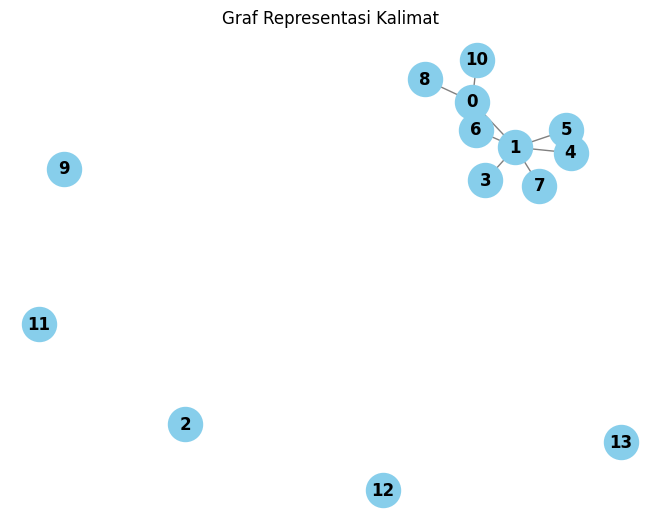

In [81]:
# Tahap 6: Tampilkan Graf
draw_graph(adj_matrix)

#### Centrality

In [82]:
chosen_method = int(input("\nTahap 7: Pilih metode centrality \n1. degree \n2. closeness \n3. betweenness: \n"))  # Mengubah input menjadi integer
centrality_scores = compute_centrality(adj_matrix, chosen_method)

df_centrality = pd.DataFrame(list(centrality_scores.items()), columns=["Node", "Centrality Score"])
print(f"\nTahap 7: Hasil {['Degree', 'Closeness', 'Betweenness'][chosen_method - 1]} Centrality")
print(df_centrality)


Tahap 7: Pilih metode centrality 
1. degree 
2. closeness 
3. betweenness: 
1

Tahap 7: Hasil Degree Centrality
    Node  Centrality Score
0      0          0.307692
1      1          0.461538
2      2          0.000000
3      3          0.076923
4      4          0.153846
5      5          0.153846
6      6          0.153846
7      7          0.076923
8      8          0.076923
9      9          0.000000
10    10          0.076923
11    11          0.000000
12    12          0.000000
13    13          0.000000


#### Ringkasan

In [83]:
# Tahap 8: Menampilkan Ringkasan
summary = generate_summary(sentences, centrality_scores)
print("\nRingkasan Berita")
print(summary)


Ringkasan Berita
['Ada dua opsi yang diyakini bakal jadi pilihan Shin Tae Yong untuk jadi kapten Timnas Indonesia yakni Jordi Amat dan Jay Idzes.', 'Jakarta, CNN Indonesia -- Netizen memperdebatkan pemain yang bakal dipilih jadi kapten dalam pertandingan Timnas Indonesia vs Bahrain di Kualifikasi Piala Dunia 2026.', 'Terlepas dari perdebatan netizen, baik Jay Idzes maupun Jordi Amat adalah pemain berkualitas yang dimiliki Timnas Indonesia saat ini.']
